## МЕТОДЫ МАШИННОГО ОБУЧЕНИЯ С УЧИТЕЛЕМ

In [58]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

форма массива Х: (26, 2)


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


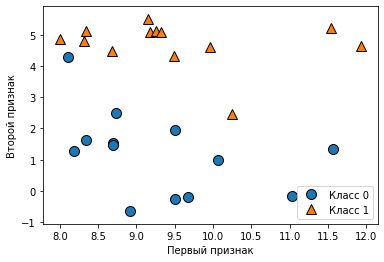

In [59]:
from sklearn.datasets import make_blobs
# генерируем набор данных
X, y = mglearn.datasets.make_forge()
# строим график для набора данных
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Класс 0', 'Класс 1'], loc=4)
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
print('форма массива Х: {}'.format(X.shape))

Text(0, 0.5, 'Целевая переменная')

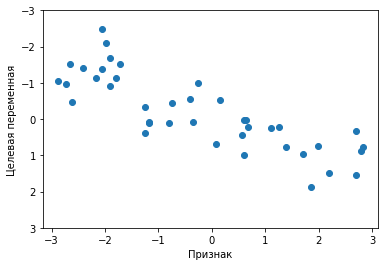

In [60]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(3, -3)
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')

In [61]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('Ключи cancer(): \n{}'.format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [62]:
print('Форма массива data для набора cancer: {}'.format(
    cancer.data.shape))

Форма массива data для набора cancer: (569, 30)


In [63]:
print("Количество примеров для каждого класса:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [64]:
print("Имена признаков:\n{}".format(cancer.feature_names))

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [65]:
from sklearn.datasets import load_boston
boston = load_boston()
print("форма массива data для набора boston: {}".format(
    boston.data.shape))

форма массива data для набора boston: (506, 13)


In [66]:
X, y = mglearn.datasets.load_extended_boston()
print("форма массива X: {}".format(X.shape))

форма массива X: (506, 104)


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


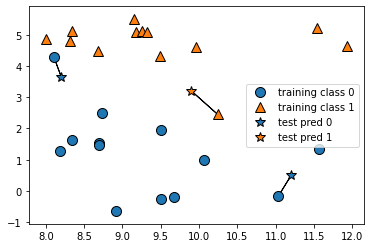

In [67]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


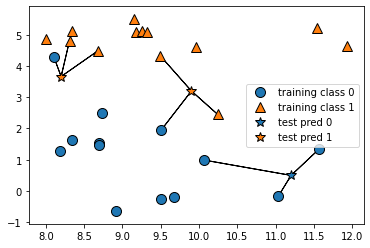

In [68]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [69]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [70]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))
print("Правильность на тестовом наборе: {:.2f}".format(
    clf.score(X_test, y_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.86


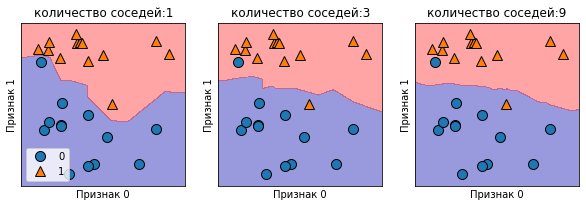

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
# создаем объект классификатор и подгоняем в одной строке
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(
    clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('количество соседей:{}'.format(n_neighbors))
    ax.set_xlabel('Признак 0')
    ax.set_ylabel('Признак 1')
axes[0].legend(loc=3)

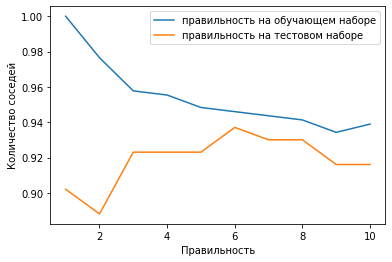

In [72]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, 
    random_state=66)

training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # строим модель
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
    # записываем правильность на тестовом наборе
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy,
        label='правильность на обучающем наборе')
plt.plot(neighbors_settings, test_accuracy,
        label='правильность на тестовом наборе')
plt.xlabel('Правильность')
plt.ylabel('Количество соседей')
plt.legend()

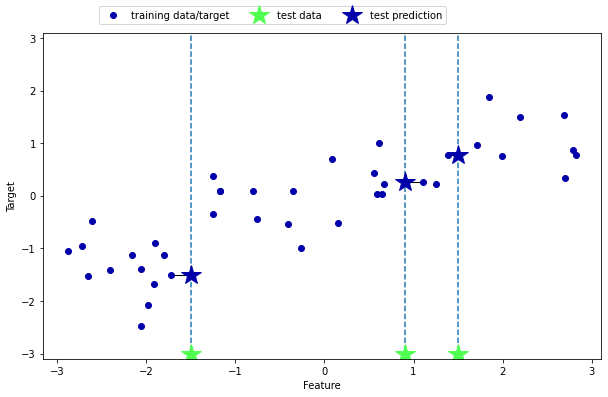

In [73]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

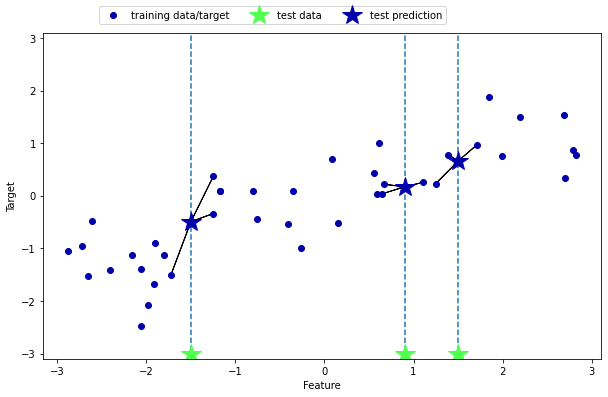

In [74]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [75]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей = 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель
reg.fit(X_train, y_train)
print('Прогнозы для тестового набора:\n{}'.format(
    reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [76]:
print("R2 на тестовом наборе: {:.2f}".format(
    reg.score(X_test, y_test)))

R2 на тестовом наборе: 0.83


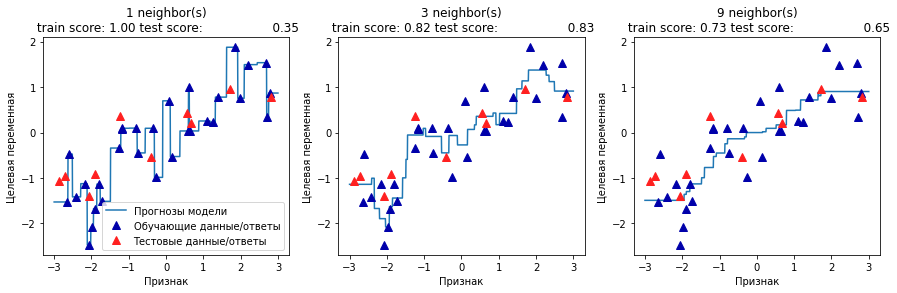

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данныхб равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # получаем прогнозы, используя 1, 3, 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, '^', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbor(s)\n train score: {:.2f} test score: \
                 {:.2f}'.format(
                 n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
    ax.set_xlabel('Признак')
    ax.set_ylabel('Целевая переменная')
axes[0].legend(['Прогнозы модели', 'Обучающие данные/ответы', 
               'Тестовые данные/ответы'], loc='best')

w[0]: 0.393906  b: -0.031804


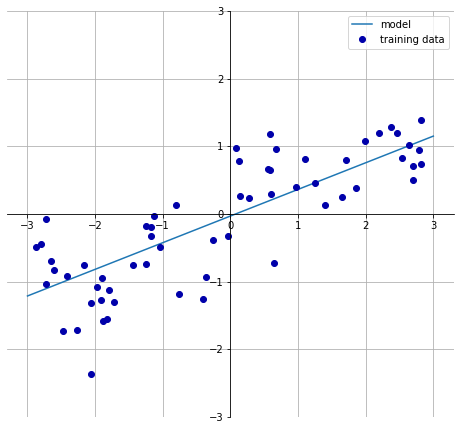

In [78]:
mglearn.plots.plot_linear_regression_wave()

In [79]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [80]:
print("Правильность на обучающем наборе: {:.2f}".format(
    lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [81]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


In [82]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [83]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [84]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


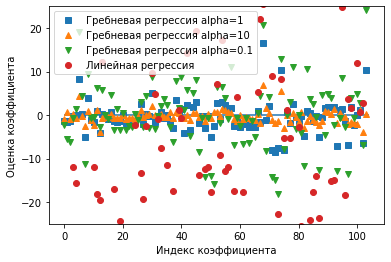

In [85]:
plt.plot(ridge.coef_, 's', label='Гребневая регрессия alpha=1')
plt.plot(ridge10.coef_, '^', label='Гребневая регрессия alpha=10')
plt.plot(ridge01.coef_, 'v', label='Гребневая регрессия alpha=0.1')
plt.plot(lr.coef_, 'o', label='Линейная регрессия')

plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

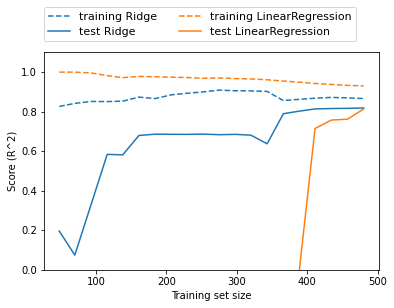

In [86]:
mglearn.plots.plot_ridge_n_samples()

In [87]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(
    lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(
    np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.21
Количество использованных признаков: 4


In [88]:
# мы увеличиваем значение max_iter
# иначе модель выдаст предупреждение, что нужно увеличить max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(
    np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


In [89]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(
    np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 96


Text(0, 0.5, 'Оценка коэффициента')

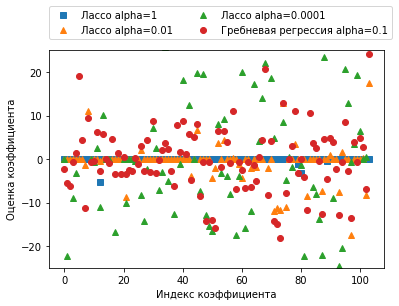

In [90]:
plt.plot(lasso.coef_, 's', label='Лассо alpha=1')
plt.plot(lasso001.coef_, '^', label='Лассо alpha=0.01')
plt.plot(lasso00001.coef_, '^', label='Лассо alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Гребневая регрессия alpha=0.1')

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


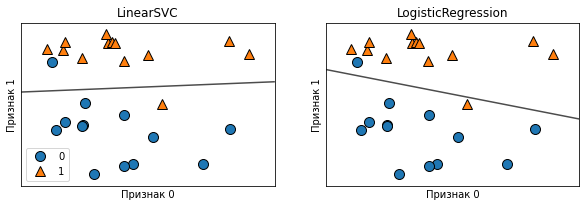

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Признак 0')
    ax.set_ylabel('Признак 1')
axes[0].legend()    

In [92]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
        cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.951
Правильность на тестовом наборе: 0.951


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)


print("Правильность на обучающем наборе: {:.3f}".format(
    logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.946
Правильность на тестовом наборе: 0.958


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.937
Правильность на тестовом наборе: 0.930


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


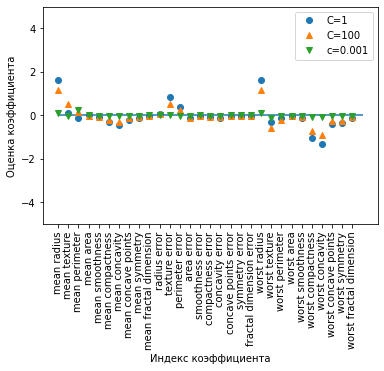

In [95]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='c=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,
          rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')
plt.legend()

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Правильность на обучении для логрегрессии l2 с C=0.001:0.94
Правильность на тесте для логрегрессии l2 с C=0.001:0.94


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Правильность на обучении для логрегрессии l2 с C=1.000:0.95
Правильность на тесте для логрегрессии l2 с C=1.000:0.95
Правильность на обучении для логрегрессии l2 с C=100.000:0.95
Правильность на тесте для логрегрессии l2 с C=100.000:0.96


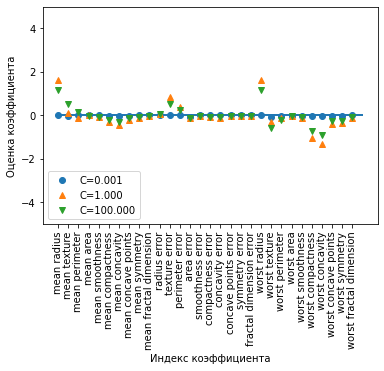

In [96]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l2 = LogisticRegression(C=C, penalty='l2').fit(
        X_train, y_train)   
    print("Правильность на обучении для логрегрессии l2 с C={:.3f}:{:.2f}". \
          format(C, lr_l2.score(X_train, y_train)))
    print("Правильность на тесте для логрегрессии l2 с C={:.3f}:{:.2f}". \
          format(C, lr_l2.score(X_test, y_test)))

    plt.plot(lr_l2.coef_.T, marker, label='C={:.3f}'.format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, 
               rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel('Индекс коэффициента')
    plt.ylabel('Оценка коэффициента')
    plt.ylim(-5, 5)
    plt.legend(loc=3)

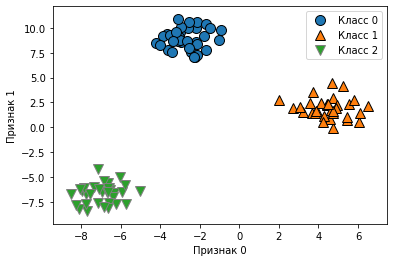

In [97]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2'])

In [98]:
linear_svm = LinearSVC().fit(X, y)
print('Форма коэффициента: ', linear_svm.coef_.shape)
print('Форма константы: ', linear_svm.intercept_.shape)

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


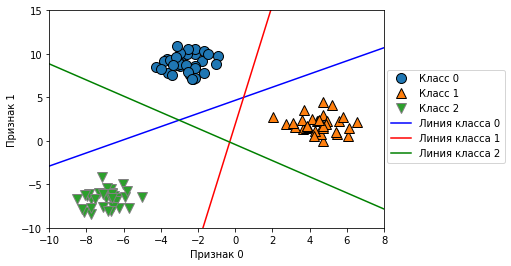

In [99]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 
           'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Признак 1')

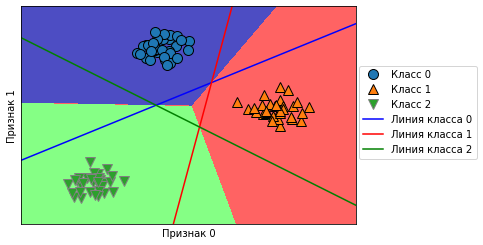

In [100]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, 
                                    alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_,
    linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [101]:
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [102]:
counts = {}
for label in np.unique(y):
    # итерируем по каждому классу
    # подсчитываем (суммируем) элементы 1 по признаку
    counts[label]= X[y == label].sum(axis=0)
print('Частоты признаков:\n{}'.format(counts))

Частоты признаков:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


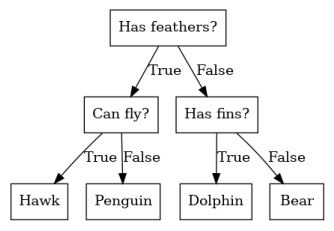

In [103]:
mglearn.plots.plot_animal_tree()

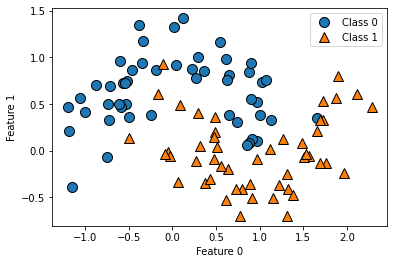

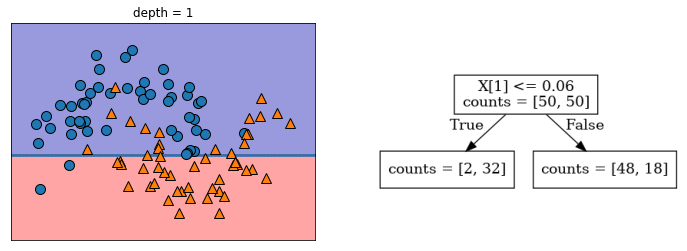

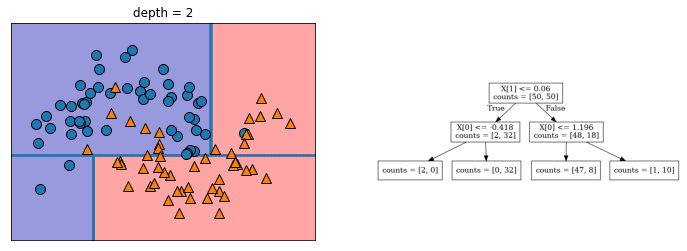

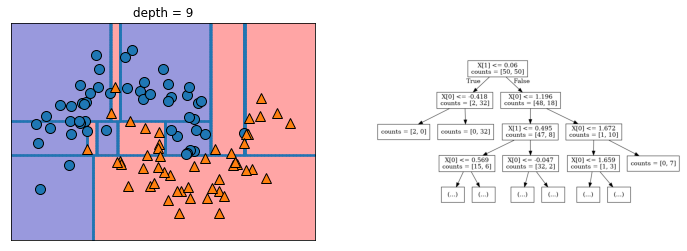

In [104]:
mglearn.plots.plot_tree_progressive()

In [105]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
    cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.902


In [106]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


In [107]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', 
        class_names=['malignant', 'benign'],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

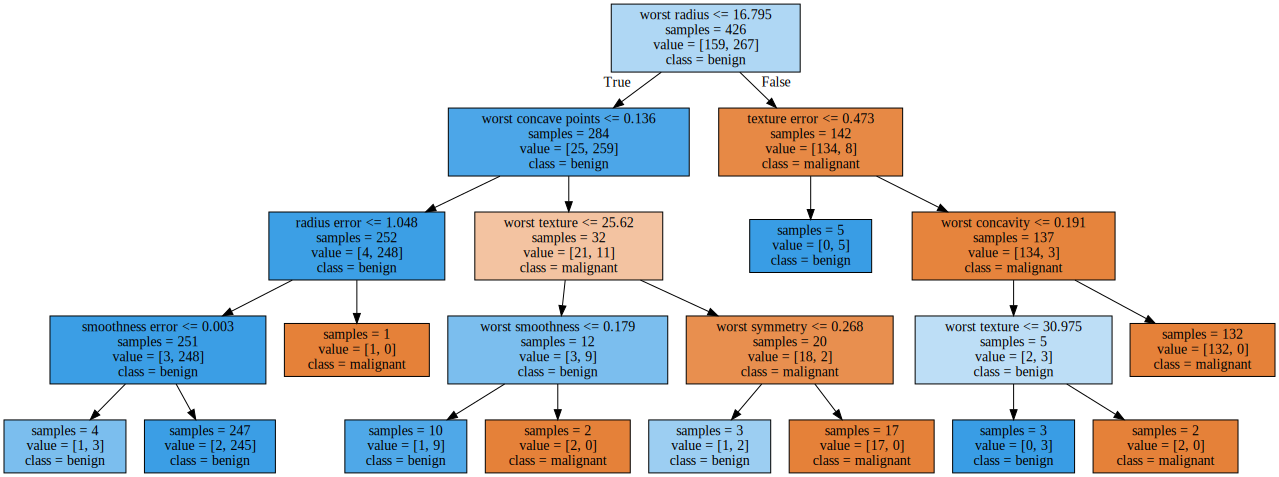

In [108]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [109]:
from sklearn import tree

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)

In [110]:
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('cancer.pdf')

True

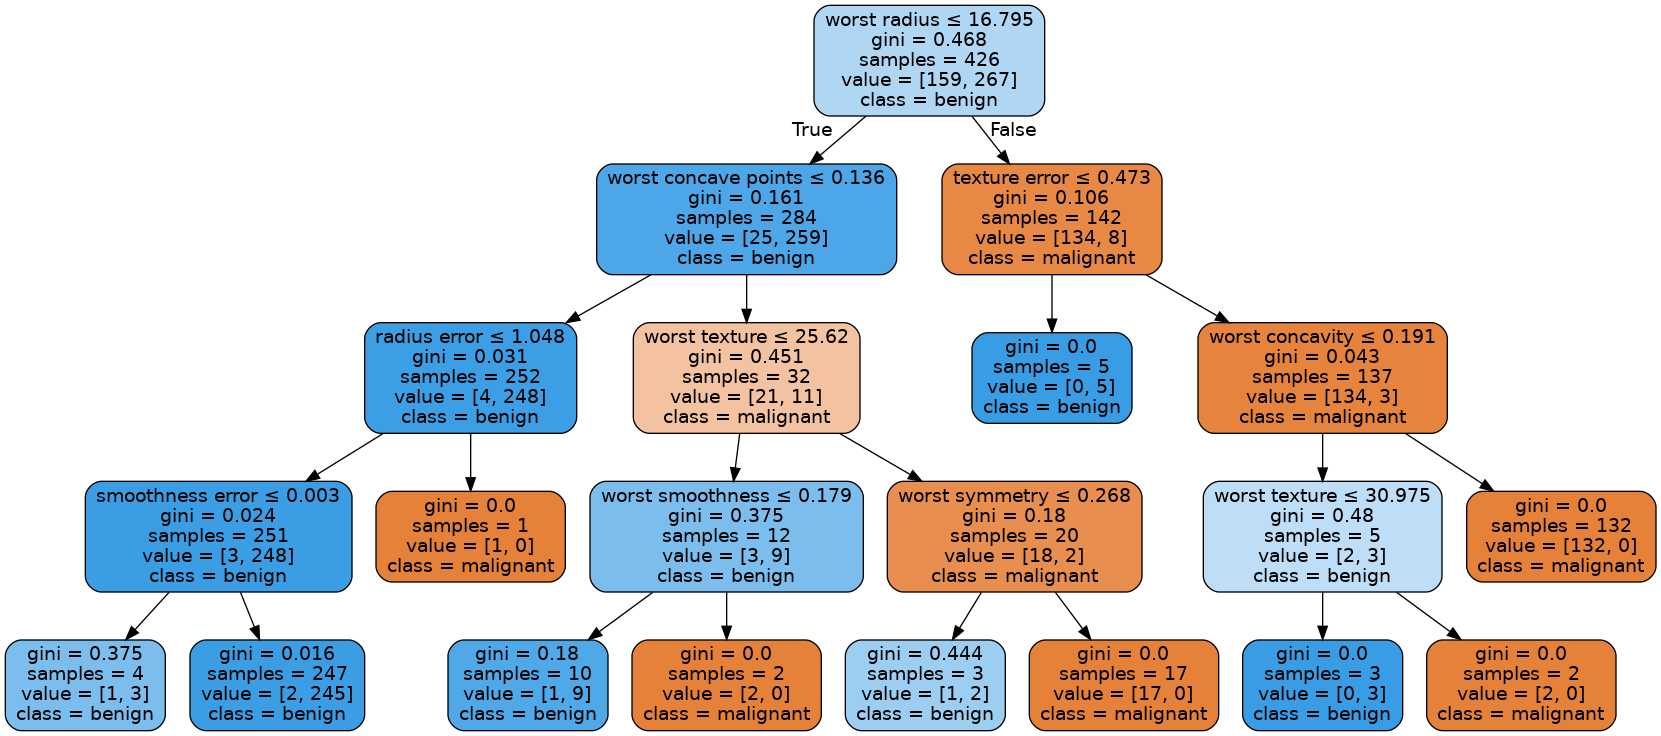

In [111]:
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=cancer.feature_names,
                               class_names=cancer.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [112]:
print('Важности признаков:\n{}'.format(clf.feature_importances_))

Важности признаков:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [113]:
for name, score in zip(cancer['feature_names'],
                      clf.feature_importances_):
    print(name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


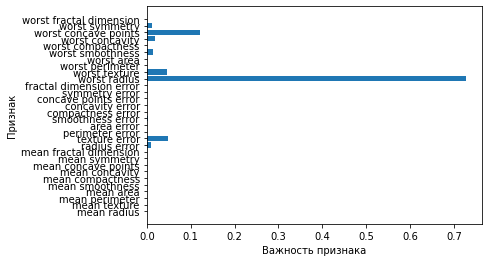

In [114]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,
            align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Важность признака')
    plt.ylabel('Признак')
    
plot_feature_importances_cancer(clf)

Feature importances: [0. 1.]


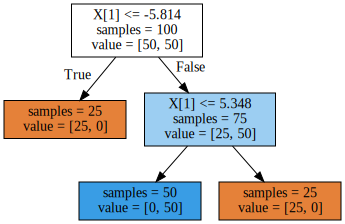

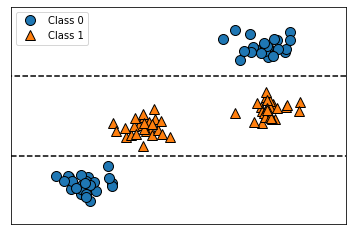

In [115]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [116]:
ram_prices = pd.read_csv('/home/miss/kaggle/File/ram_price.csv')

In [117]:
import os
os.getcwd()

'/home/miss/kaggle/Code/ML_Book'

Text(0, 0.5, 'Цена $/Мбайт')

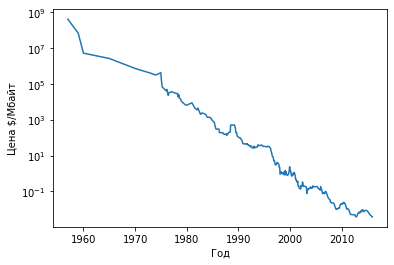

In [118]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Год')
plt.ylabel('Цена $/Мбайт')

In [119]:
from sklearn.tree import DecisionTreeRegressor
# используем исторические данные для прогнозирования цен после
# 2000 года
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# прогнозируем цены по датам
X_train = data_train.date[:, np.newaxis]
# мы используем логпреобразование, чтобы получить простую 
# взаимосвязь между данными и откликом
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# прогнозируем по всем данным
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# экспоненцируем, чтобы обратить логарифмическое преобразование
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-119-5128c41f448e>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-119-5128c41f448e>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


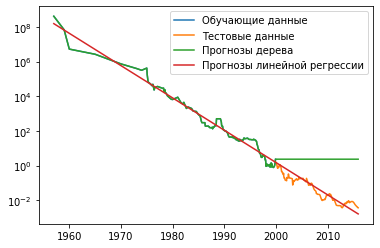

In [120]:
plt.semilogy(data_train.date, data_train.price, 
             label='Обучающие данные')
plt.semilogy(data_test.date, data_test.price, 
             label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_lr, 
             label="Прогнозы линейной регрессии")
plt.legend()

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   stratify=y,
                                                   random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

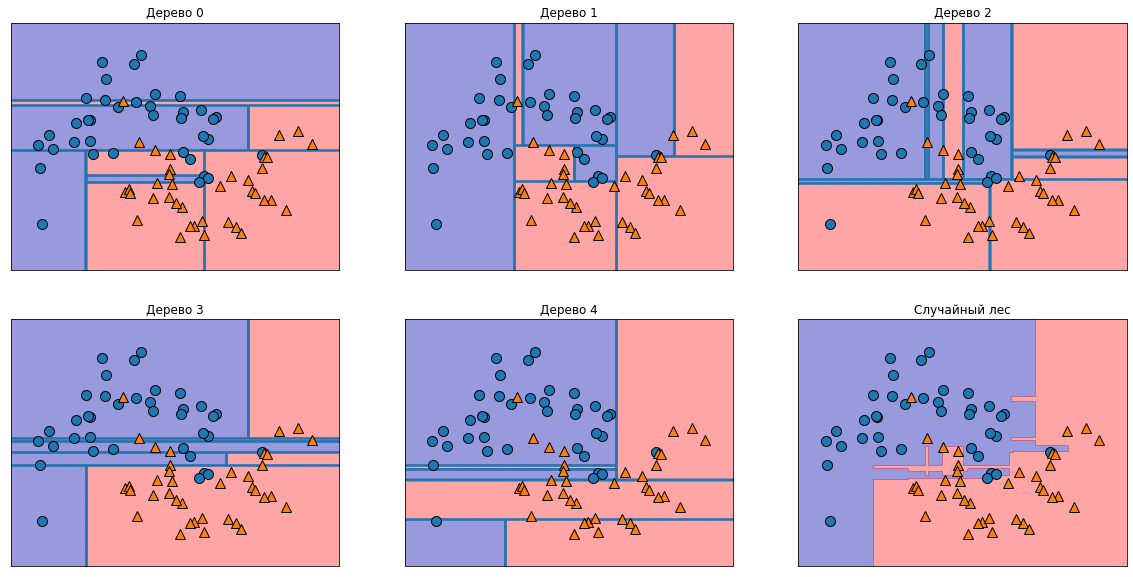

In [122]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), 
                                   forest.estimators_)):
    ax.set_title('Дерево {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True,
                               ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Случайный лес')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(forest.score(X_train, y_train), 'обучение')
print(forest.score(X_test, y_test), 'тест')

1.0 обучение
0.972027972027972 тест


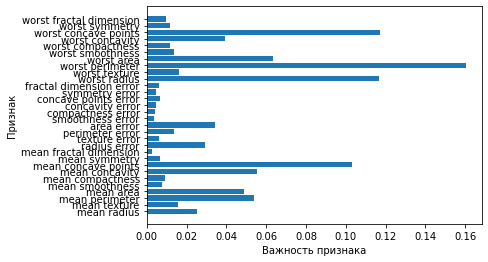

In [124]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, 
            align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Важность признака')
    plt.ylabel('Признак')
    
plot_feature_importances_cancer(forest)

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.965


In [126]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.972


In [127]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.965


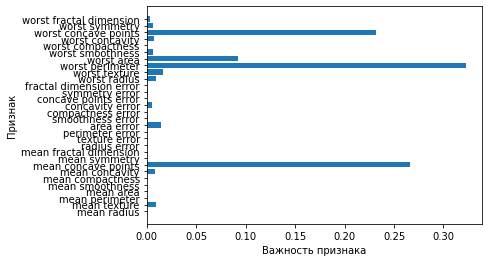

In [128]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'Признак 1')

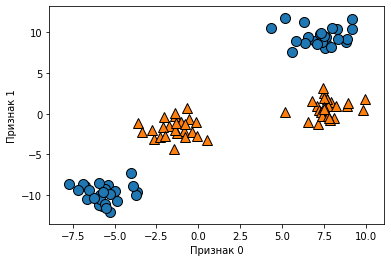

In [129]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Признак 1')

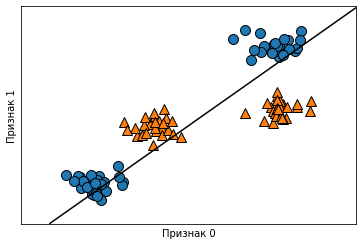

In [130]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0.5, 0, 'признак1 ** 2')

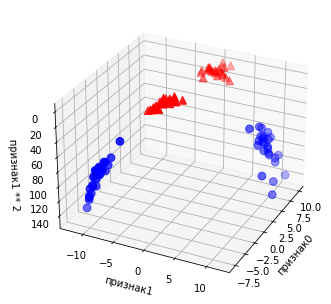

In [131]:
# добавляем второй признак, возведенный в квадрат
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
# визуализируем в 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# сначала размещаем на графике все точки с y == 0, затем с y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'признак1 ** 2')

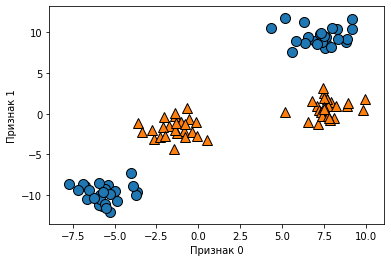

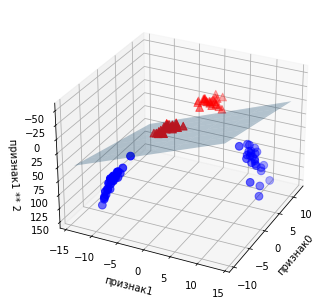

In [132]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# показать границу принятия решений линейной модели
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")

Text(0, 0.5, 'Признак 1')

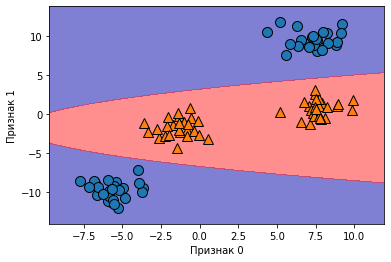

In [133]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(),
                                           ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0,
            dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0, 0.5, 'Признак 1')

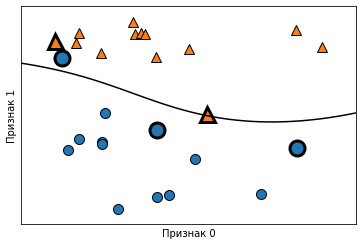

In [134]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# размещаем на графике опорные векторы
sv = svm.support_vectors_
# метки классов опорных векторов определяются знаком дуальных коэффициентов
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

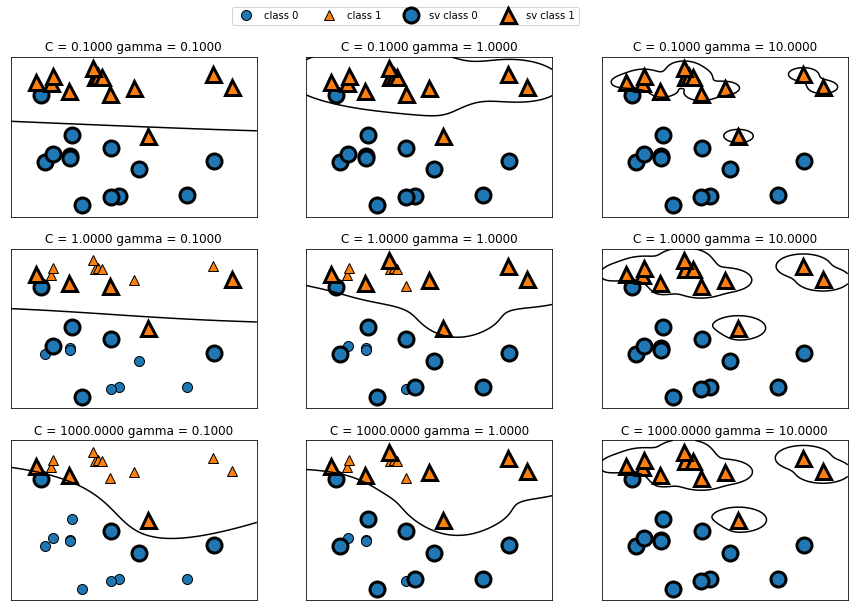

In [135]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
ncol=4, loc=(.9, 1.2))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    svc.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(
    svc.score(X_test, y_test)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.94


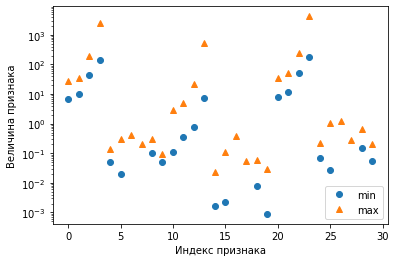

In [137]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel('Индекс признака')
plt.ylabel('Величина признака')
plt.yscale('log')

In [138]:
# вычисляем мин значение для каждго признака обучающего набора
min_on_training = X_train.min(axis=0)
# вычисляем ширину диап. для каждого признака (max - min) об.набора
range_on_training = (X_train - min_on_training).max(axis=0)

# вычитаем минимальное значение и затем делим на ширину диапазона
# min = 0 & max = 1 для каждого признака
X_train_scaled = (X_train - min_on_training) / range_on_training


print("Минимальное значение для каждого признака\n{}".format(
    X_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(
    X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальное значение для каждого признака
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [139]:
# используем то же самое преобразование для тестового набора,
# используя минимум и ширину диапазона из обучающего набора
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.984
Правильность на тестовом наборе: 0.972


In [140]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.958


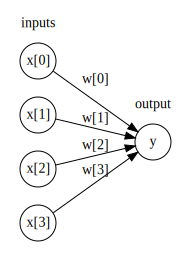

In [141]:
display(mglearn.plots.plot_logistic_regression_graph())

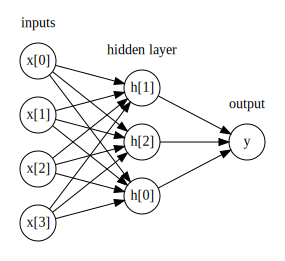

In [142]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

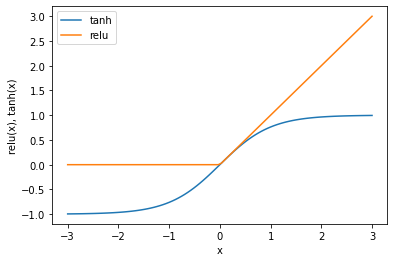

In [143]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

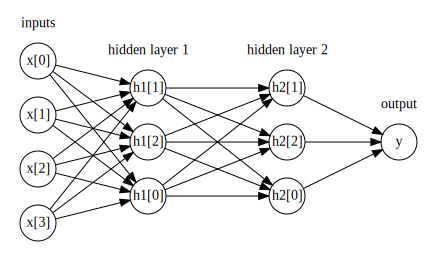

In [144]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Признак 1')

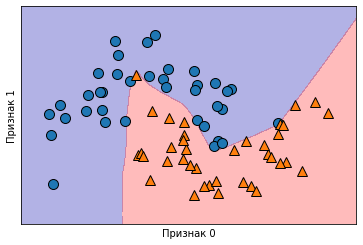

In [145]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                   random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Признак 1')

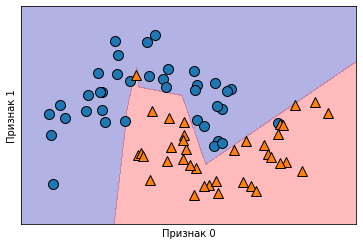

In [146]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0, 0.5, 'Признак 1')

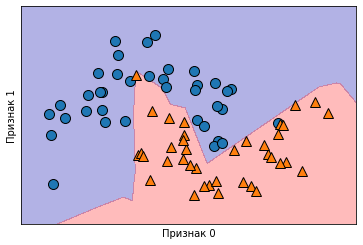

In [147]:
# использование двух скрытых слоев по 10 элементов в каждом
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Признак 1')

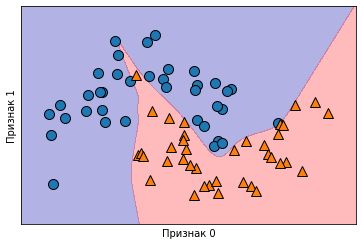

In [148]:
# использование двух скрытых слоев по 10 элементов в каждом, на этот раз с функцией tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


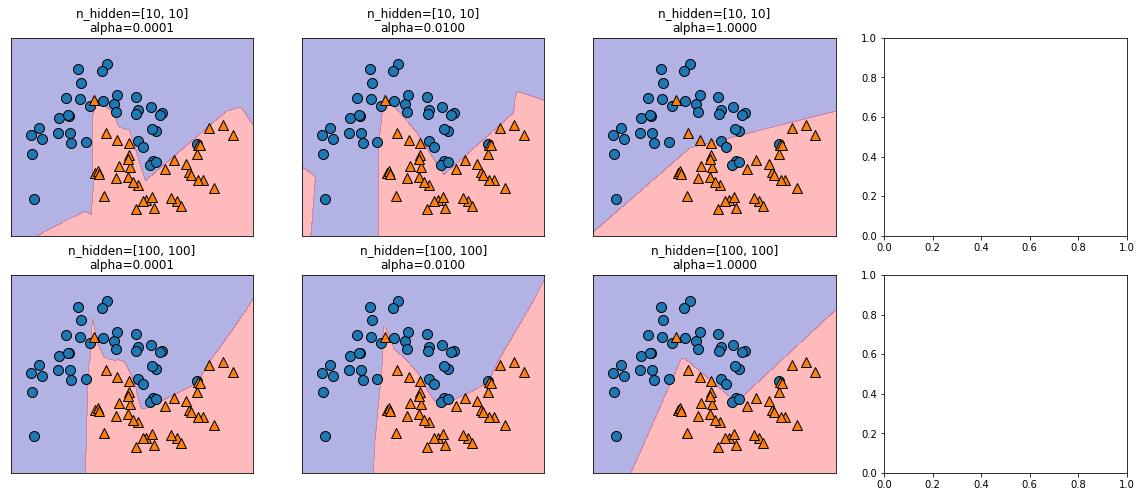

In [149]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                           hidden_layer_sizes=[n_hidden_nodes,
                                              n_hidden_nodes], 
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, 
                                       alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                                ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(
        n_hidden_nodes, n_hidden_nodes, alpha))

/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


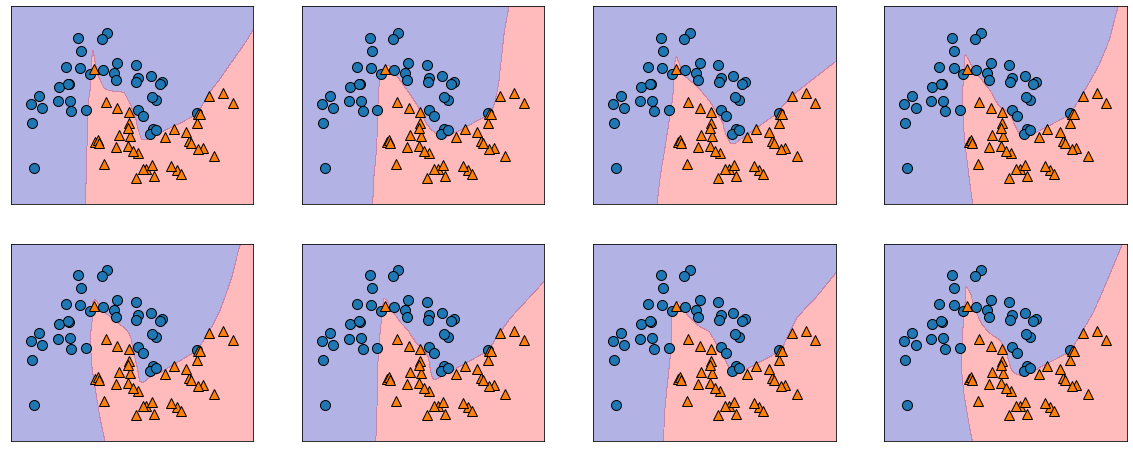

In [150]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
    hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, 
                                    alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, 
                             ax=ax)

In [151]:
print('Максимальное значение характеристик:\n{}'.format(
    cancer.data.max(axis=0)))

Максимальное значение характеристик:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [152]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                   random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(
    mlp.score(X_train, y_train)))
print("Правильности на тестовом наборе: {:.2f}".format(
    mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.94
Правильности на тестовом наборе: 0.92


In [153]:
# вычисляем данные для каждлго признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака об.набора
std_on_train = X_train.std(axis=0)

# вычитаем среднее и умножаем на обратную величину ст.отклонения
# mean=0, std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем то же самое для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.965


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [154]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


In [155]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(
    mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


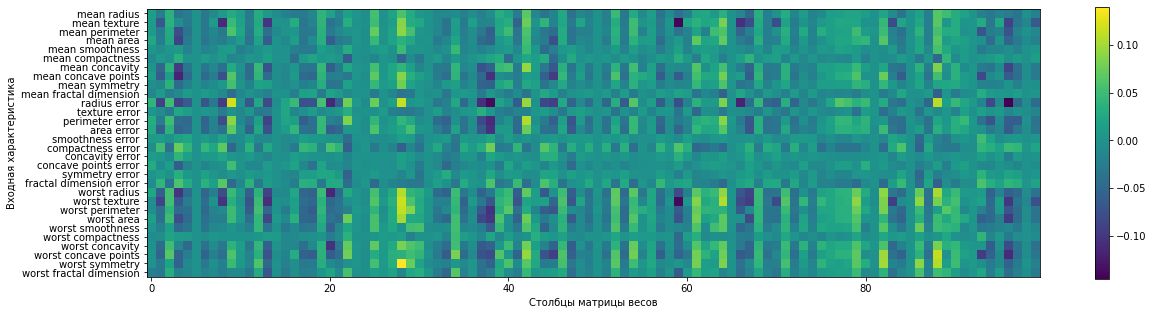

In [156]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Столбцы матрицы весов')
plt.ylabel('Входная характеристика')
plt.colorbar()

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# мы переименовываем классы в blue и red для удобства
y_named = np.array(['blue', 'red'])[y]

# мы можем вызвать train_test_split с любым количеством массивов,
# все будут разбиты одинаковым образом
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

# строим модель градиентного бустинга
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [158]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма решающей функции: {}".format(
gbrt.decision_function(X_test).shape))

Форма массива X_test: (25, 2)
Форма решающей функции: (25,)


In [159]:
# выведем несколько первых элементов решающей функции
print('Решающая функция:\n{}'.format(gbrt.decision_function(
X_test)[:6]))

Решающая функция:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [160]:
print("Решающая функция с порогом отсечения:\n{}".format(
gbrt.decision_function(X_test) > 0))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Решающая функция с порогом отсечения:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Прогнозы:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [161]:
# переделаем булевы значения True/False в 0 и 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# используем 0 и 1 в качестве индексов атрибута classes_
pred = gbrt.classes_[greater_zero]
# pred идентичен выводу gbrt.predict
print('pred идентичен прогнозам: {}'.format(np.all(
pred == gbrt.predict(X_test))))

pred идентичен прогнозам: True


In [162]:
decision_function = gbrt.decision_function(X_test)
print("Решающая функция минимум: {:.2f} максимум: {:.2f}".format(
np.min(decision_function), np.max(decision_function)))

Решающая функция минимум: -7.69 максимум: 4.29


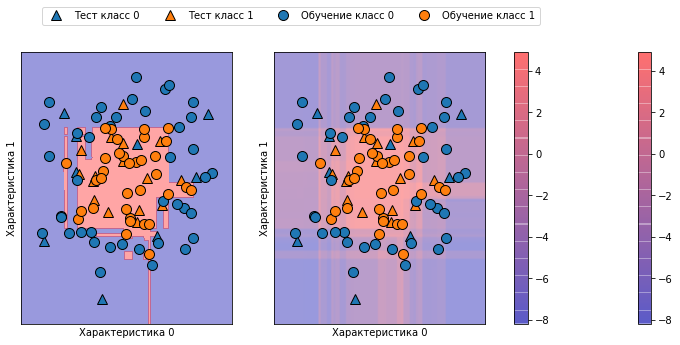

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # размещаем на графике точки обучающего и тестового наборов
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
    markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
    markers='o', ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Тест класс 0", "Тест класс 1", "Обучение класс 0",
    "Обучение класс 1"], ncol=4, loc=(.1, 1.1))

In [164]:
print("Форма вероятностей: {}".format(
    gbrt.predict_proba(X_test).shape))

Форма вероятностей: (25, 2)


In [165]:
# выведем первые несколько элементов predict_proba
print('Спрогнозированные вероятности:\n{}'.format(
gbrt.predict_proba(X_test[:6])))

Спрогнозированные вероятности:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


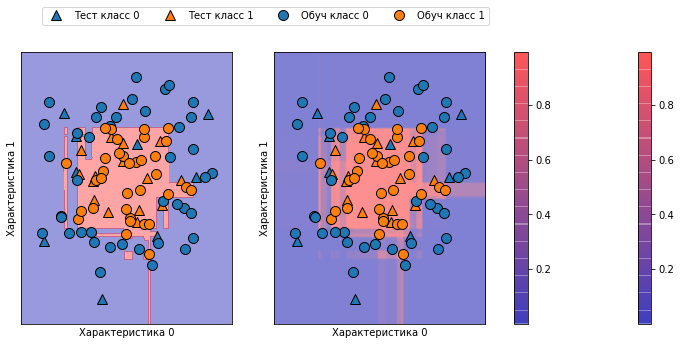

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    # размещаем на графике точки обучающего и тестового наборов
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
    markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
    markers='o', ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Тест класс 0", "Тест класс 1", "Обуч класс 0",
    "Обуч класс 1"], ncol=4, loc=(.1, 1.1))

In [167]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                   iris.target,
                                                   random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, 
                                 random_state=0)
gbrt.fit(X_train, y_train)

print("Форма решающей функции: {}".format(
    gbrt.decision_function(X_test).shape))
# выведем первые несколько элементов решающей функции
print("Решающая функция:\n{}".format(
    gbrt.decision_function(X_test)[:6, :]))

Форма решающей функции: (38, 3)
Решающая функция:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [168]:
print("Argmax решающей функции:\n{}".format(
np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))
print('pred идентичен прогнозам: {}'.format(np.all(np.argmax(gbrt.decision_function(X_test), axis=1) == \
     gbrt.predict(X_test))))

Argmax решающей функции:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
pred идентичен прогнозам: True


In [169]:
print("Argmax спрогнозированных вероятностей:\n{}".format(
np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Argmax спрогнозированных вероятностей:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [170]:
logreg = LogisticRegression(max_iter=1000)
# представим каждое целевое значение названием класса в наборе iris
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("уникальные классы в обучающем наборе: {}".format(
    logreg.classes_))
print("прогнозы: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(
    logreg.decision_function(X_test), axis=1)
print("argmax решающей функции: {}".format(argmax_dec_func[:10]))
print("argmax объединенный с классами_: {}".format(
logreg.classes_[argmax_dec_func][:10]))

уникальные классы в обучающем наборе: ['setosa' 'versicolor' 'virginica']
прогнозы: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax решающей функции: [1 0 2 1 1 0 1 2 1 1]
argmax объединенный с классами_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


In [171]:
# продолжение в ML_Book(part_3_ML_without_teacher_and_pre_processing)